In [9]:
#Import of MobileNet repositories
from keras.applications import MobileNet
mobilenet=MobileNet(weights='imagenet') 

In [10]:
#Import Libraries
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.mobilenet import preprocess_input
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
#Definition of the additional layers
from keras.layers import Dense,GlobalAveragePooling2D

base_model=MobileNet(weights='imagenet', include_top=False) 
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(1024,activation='relu')(x)
x=Dense(512,activation='relu')(x)
preds=Dense(6,activation='softmax')(x)

In [12]:
#Definition of the Model
from keras.models import Model

model=Model(inputs=base_model.input,outputs=preds)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
__________

In [13]:
#Determining the layers for additional training
for layer in model.layers[:-5]:
    layer.trainable=False

In [14]:
#Importing of training photos of the data set
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator=train_datagen.flow_from_directory(
    './Guitars/',
    target_size=(224,224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

Found 3389 images belonging to 6 classes.


In [15]:
#Model Compilation
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
#Model Training
model.fit_generator(
    generator=train_generator,
    steps_per_epoch=train_generator.n/train_generator.batch_size,
    epochs=15
)

Epoch 1/15
106/105 [==============================] - 60s 566ms/step - loss: 1.2733 - acc: 0.5054
Epoch 2/15
106/105 [==============================] - 61s 578ms/step - loss: 0.8069 - acc: 0.7001
Epoch 3/15
106/105 [==============================] - 63s 590ms/step - loss: 0.7196 - acc: 0.7328
Epoch 4/15
106/105 [==============================] - 62s 584ms/step - loss: 0.5314 - acc: 0.8043
Epoch 5/15
106/105 [==============================] - 62s 585ms/step - loss: 0.4703 - acc: 0.8280
Epoch 6/15
106/105 [==============================] - 62s 589ms/step - loss: 0.3617 - acc: 0.8690
Epoch 7/15
106/105 [==============================] - 62s 585ms/step - loss: 0.3816 - acc: 0.8646
Epoch 8/15
106/105 [==============================] - 62s 584ms/step - loss: 0.3141 - acc: 0.8912
Epoch 9/15
106/105 [==============================] - 62s 580ms/step - loss: 0.2975 - acc: 0.8864
Epoch 10/15
106/105 [==============================] - 69s 653ms/step - loss: 0.2103 - acc: 0.9201
Epoch 11/15
106/105

In [17]:
#Definition of the outputs
print(train_generator.class_indices)

{'Hollow Body': 0, 'Les Paul': 1, 'SG': 2, 'Semi Hollow': 3, 'Stratocaster': 4, 'Telecaster': 5}


In [18]:
#from tkinter import *
#from tkinter.filedialog import askopenfilename

#root = Tk()
#root.update()
#filename = askopenfilename()
#root.destroy()

In [23]:
import cv2

cam = cv2.VideoCapture(0)   # 0 -> index of camera
s, img = cam.read()
if s:    # frame captured without any errors
    cv2.namedWindow("cam-test",cv2.WINDOW_AUTOSIZE)
    cv2.imshow("cam-test",img)
    cv2.waitKey(0)
    cv2.destroyWindow("cam-test")
    cv2.imwrite("filename.jpg",img) #save image

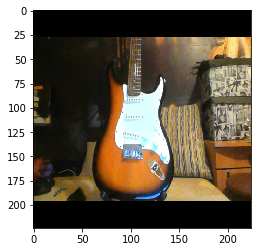

4

In [24]:
#Test Prediction
original = load_img('filename.jpg', target_size=(224, 224))
plt.imshow(original)
plt.show()
 
numpy_image = img_to_array(original)
image_batch = np.expand_dims(numpy_image, axis=0)

processed_image = preprocess_input(image_batch.copy())
predictions = model.predict(processed_image)

result = np.argmax(predictions)

result

In [25]:
#Redirecting to the shop categories
import webbrowser
if result == 0:
    webbrowser.open('https://www.andertons.co.uk/guitar-dept/electric-guitars/hollow-semi-hollow-body-guitars?#facet:&productBeginIndex:0&facetLimit:&orderBy:&pageView:grid&minPrice:&maxPrice:&pageSize:&')
elif result == 1:
    webbrowser.open('https://www.andertons.co.uk/guitar-dept/electric-guitars/les-paul?#facet:&productBeginIndex:0&facetLimit:&orderBy:&pageView:grid&minPrice:&maxPrice:&pageSize:&')
elif result == 2:
    webbrowser.open('https://www.andertons.co.uk/sg-guitars?#facet:&productBeginIndex:0&facetLimit:&orderBy:&pageView:grid&minPrice:&maxPrice:&pageSize:&')   
elif result == 3:
    webbrowser.open('https://www.andertons.co.uk/guitar-dept/electric-guitars/hollow-semi-hollow-body-guitars?#facet:&productBeginIndex:0&facetLimit:&orderBy:&pageView:grid&minPrice:&maxPrice:&pageSize:&')
elif result == 4:
    webbrowser.open('https://www.andertons.co.uk/guitar-dept/electric-guitars/stratocaster?#facet:&productBeginIndex:0&facetLimit:&orderBy:&pageView:grid&minPrice:&maxPrice:&pageSize:&')
else:
    webbrowser.open('https://www.andertons.co.uk/guitar-dept/electric-guitars/telecaster?#facet:&productBeginIndex:0&facetLimit:&orderBy:&pageView:grid&minPrice:&maxPrice:&pageSize:&')